In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#tax_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv" )

In [3]:
#test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')

In [4]:
#df = tax_data

In [5]:
#df2 = test_data

In [6]:
df = pd.read_excel('train.xlsx')
dftest = pd.read_excel('test.xlsx')

HHI: Household income
HHDL: Household debt level
Married: There are three categories for a taxpayer 0, 1, 2 with regards to marriage.
PoliticalParty: Name of the political party
CollegeGrads: Grade in College out of 5
AHHAge: Average household age
cars: number of cars in house
Filed in YYYY: Tax filed in given year YYYY

In [7]:
df.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [8]:
#Dropping the unnamed
df = df.drop('Unnamed: 0', axis = 1)
dftest = dftest.drop('Unnamed: 0', axis = 1)

In [9]:
df.PoliticalParty.value_counts()

Democrat       269
Independent    269
Republican     265
Name: PoliticalParty, dtype: int64

In [10]:
df.isna().sum()

HHI               0
HHDL              0
Married           0
CollegGrads       0
AHHAge            0
Cars              0
Filed in 2017     0
Filed in 2016     0
Filed in 2015     0
PoliticalParty    0
dtype: int64

In [11]:
#import pandas_profiling as pp
#prof = pp.ProfileReport(df)
#prof

def age(x):
    if x >= 80:
        return 0
    elif x >= 60:
        return 1
    elif x >= 40:
        return 2
    else:
        return 3

df.AHHAge = df.AHHAge.apply(age)

In [12]:
#dftest.AHHAge = df.AHHAge.apply(age)

In [13]:
#Encoding the categorical feature. 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.PoliticalParty = encoder.fit_transform(df.PoliticalParty)
#let's preview the encoded feature
df.PoliticalParty.head()

0    0
1    2
2    1
3    2
4    0
Name: PoliticalParty, dtype: int32

0 : Democrat
2 : Republican
1 : Independent

In [14]:
df.head(3)

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,183414,-12402,1,2,28,1,0,0,1,0
1,129786,700251,2,5,63,3,0,0,0,2
2,268343,493411,2,4,44,1,1,0,1,1


In [15]:
x = df.drop("PoliticalParty", axis = 1)
y = df['PoliticalParty']

In [16]:
from sklearn.preprocessing import MinMaxScaler

#df["HHI"] = StandardScaler().fit_transform(df["HHI"].values.reshape(-1,1))
#df["HHDL"] = StandardScaler().fit_transform(df["HHDL"].values.reshape(-1,1))
minsc =MinMaxScaler()
x = minsc.fit_transform(x)

In [17]:
dftest = minsc.fit_transform(dftest)

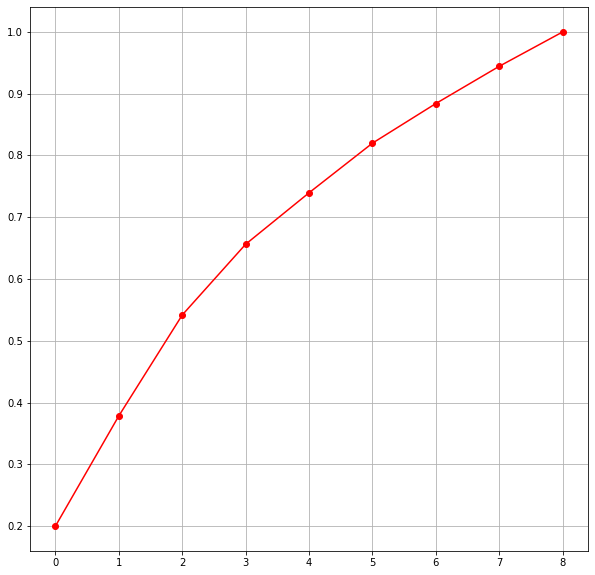

In [18]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [19]:
pca_new = PCA(n_components=6)
x = pca_new.fit_transform(x)

In [20]:
dftest = pca_new.fit_transform(dftest)

In [21]:
#dftest["HHI"] = StandardScaler().fit_transform(dftest["HHI"].values.reshape(-1,1))

#dftest["HHDL"] = StandardScaler().fit_transform(dftest["HHDL"].values.reshape(-1,1))

In [28]:
# data splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 1)

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

33.60995850622407


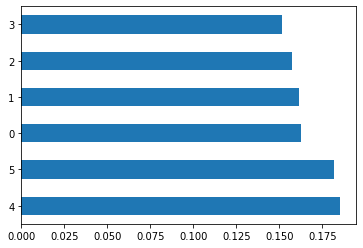

In [30]:
rf = RandomForestClassifier(n_estimators=20, random_state=33,n_jobs=-1 ,max_depth=5)
rf.fit(x_train, y_train)
rfP = rf.predict(x_test)

rfAS = accuracy_score(y_test, rfP)
rfaccuracy = rfAS*100
print (rfaccuracy)

#Feature importance
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf.feature_importances_)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [31]:
from sklearn.feature_selection import SelectFromModel
rf_sfm = SelectFromModel(rf, threshold=0.1)

rf_sfm = rf_sfm.fit(x_train, y_train)

X_important_train = rf_sfm.transform(x_train)
X_important_test = rf_sfm.transform(x_test)

In [32]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important = clf_important.fit(X_important_train, y_train)

clf_importantP = clf_important.predict(X_important_test)

clf_importantAS = accuracy_score(y_test, clf_importantP)
clf_importantaccuracy = clf_importantAS*100
clf_importantaccuracy

33.60995850622407

In [33]:
test_important_dftest = rf_sfm.transform(dftest)


randomtarget = clf_important.predict(test_important_dftest)

randomtarget = encoder.inverse_transform(randomtarget)
randomtarget = pd.DataFrame(randomtarget, columns = ['prediction'])
randomtarget.to_csv("submissionrandommin.csv", index = False) 

In [34]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(x_train, y_train)
svcP = svc.predict(x_test)

svcAS = accuracy_score(y_test, svcP)
svcaccuracy = svcAS*100
svcaccuracy

29.460580912863072

In [35]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
knnP = knn.predict(x_test)

knnAS = accuracy_score(y_test, knnP)
knnaccuracy = knnAS*100
knnaccuracy

27.385892116182575

In [36]:
from lightgbm import LGBMClassifier
light = LGBMClassifier()
light.fit(x_train, y_train)
lightP = light.predict(x_test)

lightAS = accuracy_score(y_test, lightP)
lightaccuracy = lightAS*100
lightaccuracy

36.92946058091287

In [37]:
lighttarget = light.predict(dftest)

lighttarget = encoder.inverse_transform(lighttarget)
lighttarget = pd.DataFrame(lighttarget, columns = ['prediction'])
lighttarget.to_csv("submissionlightmin.csv", index = False)  #BEST SCORE#

In [38]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgbP = xgb.predict(x_test)

xgbAS = accuracy_score(y_test, xgbP)
xgbaccuracy = xgbAS*100
xgbaccuracy

34.439834024896264

In [39]:
dec = DecisionTreeClassifier()
dec.fit(x_train, y_train)
decP = dec.predict(x_test)

decAS = accuracy_score(y_test, decP)
decaccuracy = decAS*100
decaccuracy

32.365145228215766

In [40]:
dtarget = dec.predict(dftest)

dtarget = encoder.inverse_transform(dtarget)
dtarget = pd.DataFrame(dtarget, columns = ['prediction'])
dtarget.to_csv("submissiontwomin.csv", index = False) 

In [41]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=33)
ada.fit(x_train, y_train)
adaP = ada.predict(x_test)

adaAS = accuracy_score(y_test, adaP)
adaaccuracy = adaAS*100
adaaccuracy

32.365145228215766

In [42]:
#Recursive Feature Elimination (RFE)

from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= dec , step = 1) 
fit = rfe.fit(x_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False False False  True  True]
Feature Ranking: [1 3 2 4 1 1]


In [43]:
# Transforming the data
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

# Fitting our baseline model with the transformed data
dec_rfe_model = dec.fit(x_train_rfe, y_train)

dec_rfeP = dec_rfe_model.predict(x_test_rfe)

dec_rfeAS = accuracy_score(y_test, dec_rfeP)
decrfeaccuracy = dec_rfeAS*100
decrfeaccuracy

32.365145228215766

In [44]:
dftest_rfe = rfe.transform(dftest)

dec_rfe_modeltarget = dec_rfe_model.predict(dftest_rfe)
dec_rfe_modeltarget = encoder.inverse_transform(dec_rfe_modeltarget)

dec_rfe_modeltarget = pd.DataFrame(dec_rfe_modeltarget, columns = ['prediction'])
dec_rfe_modeltarget.to_csv("submissionrfemin.csv", index = False) 

In [39]:
#Using Boosting model

from sklearn.ensemble import GradientBoostingClassifier

boostmodel = GradientBoostingClassifier()
boostmodel.fit(x_train, y_train)
boostmodelP = boostmodel.predict(x_test)

boostmodelAS = accuracy_score(y_test, boostmodelP)
boostaccuracy = boostmodelAS*100
boostaccuracy

34.85477178423236

In [40]:
#Hyperparameter Tuning

#RandomizedSearchCV

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [41]:
gbc = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 100, 150, 250],
    'max_depth': [2, 3, 4, 8, 16, 32, None],
    'learning_rate': [0.03, 0.1, 0.3, 1]
}

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(gbc, parameters, cv=5,n_iter=20)
rs.fit(x_train, y_train)

print_results(rs)

BEST PARAMS: {'n_estimators': 250, 'max_depth': 3, 'learning_rate': 1}

0.386 (+/-0.079) for {'n_estimators': 150, 'max_depth': 16, 'learning_rate': 0.1}
0.383 (+/-0.058) for {'n_estimators': 50, 'max_depth': 8, 'learning_rate': 0.1}
0.366 (+/-0.104) for {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}
0.37 (+/-0.062) for {'n_estimators': 250, 'max_depth': 4, 'learning_rate': 0.1}
0.39 (+/-0.085) for {'n_estimators': 5, 'max_depth': 8, 'learning_rate': 0.1}
0.343 (+/-0.064) for {'n_estimators': 5, 'max_depth': 32, 'learning_rate': 0.1}
0.338 (+/-0.082) for {'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.03}
0.356 (+/-0.048) for {'n_estimators': 5, 'max_depth': 16, 'learning_rate': 0.1}
0.366 (+/-0.138) for {'n_estimators': 5, 'max_depth': 4, 'learning_rate': 0.1}
0.368 (+/-0.07) for {'n_estimators': 250, 'max_depth': None, 'learning_rate': 1}
0.374 (+/-0.057) for {'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.1}
0.347 (+/-0.073) for {'n_estimators': 250, '

In [ ]:
#gridsearch
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
gbc = GradientBoostingClassifier()
parameters = {
    'n_estimators': [80, 90, 100, 125, 150],
    'max_depth': [2,3,4,5,8,16,None],
    'learning_rate': [0.03, 0.1, 0.3, 0.5]
}
cv = GridSearchCV(gbc, parameters, cv=5)
cv.fit(x_train, y_train)

print_results(cv)

In [ ]:
cv.best_score_

In [ ]:
cvP= cv.predict(x_test)

cvAS = accuracy_score(y_test, cvP)
cvaccuracy = cvAS*100
cvaccuracy

In [ ]:
cvtarget = cv.predict(dftest)
cvtarget = encoder.inverse_transform(cvtarget)

cvtarget = pd.DataFrame(cvtarget, columns = ['prediction'])
cvtarget.to_csv("submissioncvmin.csv", index = False) 

In [45]:
from mlxtend.classifier import StackingCVClassifier

In [46]:
scvc=StackingCVClassifier(classifiers=[light,xgb],meta_classifier= dec,random_state=1)
scvc.fit(x_train,y_train)
scvc_predicted = scvc.predict(x_test)
scvc_acc_score = accuracy_score(y_test, scvc_predicted)
print("Accuracy of StackingCVClassifier:",scvc_acc_score*100,'\n')

Accuracy of StackingCVClassifier: 33.19502074688796 



In [47]:
scvctarget = scvc.predict(dftest)
scvctarget = encoder.inverse_transform(scvctarget)

scvctarget = pd.DataFrame(scvctarget, columns = ['prediction'])
scvctarget.to_csv("submissionscvcmin.csv", index = False) 

In [34]:
dtarget = dec.predict(dftest)

dtarget = encoder.inverse_transform(dtarget)
dtarget = pd.DataFrame(dtarget, columns = ['prediction'])
dtarget.to_csv("submissiontwo.csv", index = False) 